In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_excel('Iris.xls')
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
iris           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: xlabel='petalwidth', ylabel='petallength'>

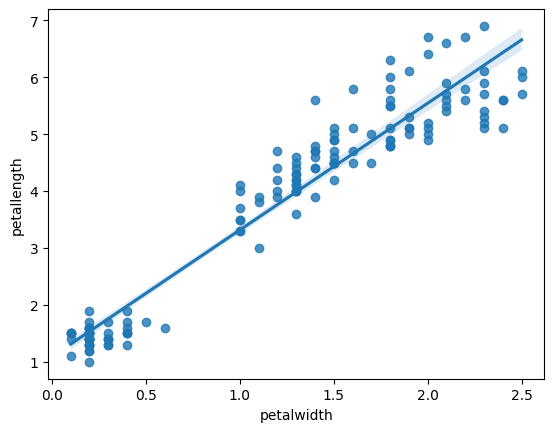

In [7]:
sns.regplot(y='petallength',x='petalwidth',data=data)

<AxesSubplot: xlabel='petalwidth', ylabel='petallength'>

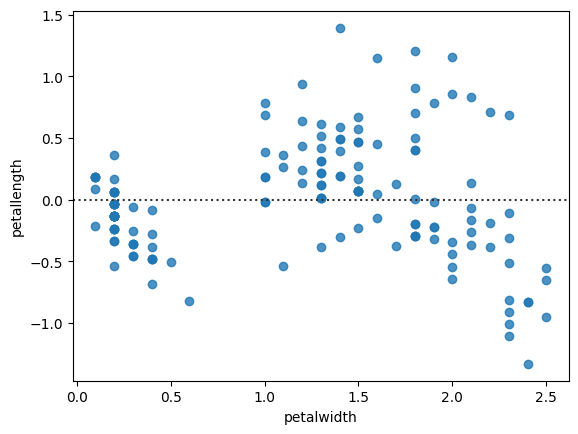

In [8]:
sns.residplot(data=data,y='petallength',x='petalwidth')

In [9]:
data[['petallength','petalwidth']].corr()

,petallength,petalwidth
petallength,1.000000,0.962757
petalwidth,0.962757,1.000000


# Chuẩn bị dữ liệu training data

In [10]:
inputs = data[['petalwidth']]
inputs.head()

,petalwidth
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [11]:
outputs = data[['petallength']]
outputs.head()


,petallength
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(inputs,outputs, test_size=0.2,random_state= 42)

Linear Regression
Simple linear regression: Xây dựng và đánh giá

In [14]:
# # Load module, tạo đối tượng linear regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
models = LinearRegression()
models.fit(X1_train,y1_train)

LinearRegression()

In [17]:
# Intercept hệ số chặn
intercept = models.intercept_
intercept

array([1.08222772])

In [18]:
# Độ dốc slope
slope = models.coef_[0]
slope

array([2.23701672])

In [19]:
y1_pred = models.predict(X1_test)

In [20]:
# Đánh giá models

In [21]:
# R2 cho toàn dữ liệu
models.score(inputs,outputs)

0.9268699678833267

In [22]:
# R2 cho tập train
models.score(X1_train,y1_train)

0.9262758349586804

In [23]:
# R2 cho tập test
models.score(X1_test,y1_test)

0.9286418347661203

In [24]:
# Đánh giá model sử dụng metrics

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mse = mean_squared_error(y1_pred,y1_test)
mse

0.23386845786901478

In [27]:
mae = mean_absolute_error(y1_pred,y1_test)
mae

0.37957828330489907

In [28]:
# reg_line = [(m* float(x)) + b for x in np.array(inputs)]
reg_line = models.predict(inputs)


In [29]:
x_now = [[1.873]]
y_now = models.predict(x_now)
y_now

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.27216005]])

Goodfitting

Đặt giới hạn trục x và y là 10.000 để chúng ta có được cái nhìn rõ hơn về vị trí của hầu hết các điểm dữ liệu.
Thêm line có độ dốc 1 đóng vai trò là tham chiếu. Nếu tất cả các điểm nằm trên line này, điều đó có nghĩa là có một mối quan hệ hoàn hảo giữa thực tế và dự đoán.

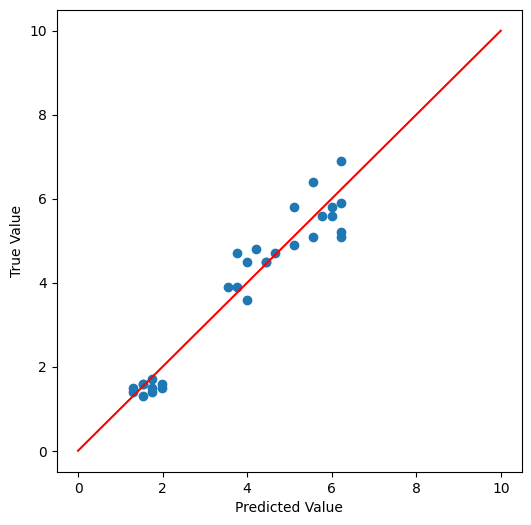

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(x=models.predict(X1_test),y=y1_test)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.plot([0,10],[0,10],'-',color = 'r')
plt.show()

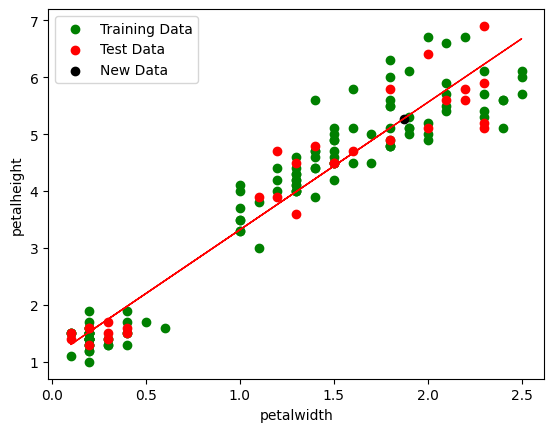

In [31]:
# Plot outputs
plt.scatter(X1_train, y1_train, color='green', label="Training Data")
plt.scatter(X1_test, y1_test, color='red', label= "Test Data")
plt.scatter(x_now, y_now, color='black', label= "New Data")
plt.plot(inputs, reg_line, color='red', linewidth = 1)
plt.xlabel("petalwidth")
plt.ylabel("petalheight")
plt.legend()
plt.show()


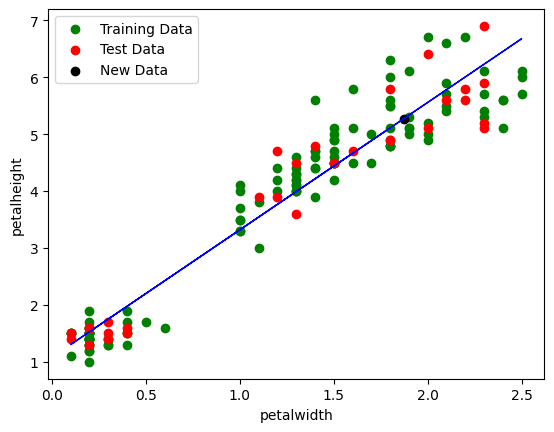

In [33]:
# Plot outputs
plt.scatter(X1_train, y1_train, color='green', label="Training Data")
plt.scatter(X1_test, y1_test, color='red', label= "Test Data")
plt.scatter(x_now, y_now, color='black', label= "New Data")
plt.plot(inputs,reg_line, color="blue", linewidth=1)
plt.xlabel("petalwidth")
plt.ylabel("petalheight")
plt.legend()
plt.show()